**INTRODUCTION**

**Customer churn** is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

**High Level Objective:**

1. The task is to develop a machine learning model to predict customer churn for a technology organization. The model should identify customers who are at risk of leaving the service, allowing the company to implement targeted retention strategies.

2. Build a data driven strategy to better the solution for the organization.

**Business Challenge Problem :**

Customer churn is a significant challenge for businesses because it represents the loss of customers who discontinue using a company's products or services. Here are some key problems associated with customer churn:

* Revenue Loss: When customers leave, businesses lose a predictable revenue stream. High churn rates can significantly impact the company's financial health.

* Increased Acquisition Costs: It often costs more to acquire new customers than to retain existing ones. High churn rates mean businesses need to spend more on marketing and sales to replace lost customers.

* Negative Brand Image: High churn rates can indicate customer dissatisfaction, potentially damaging the company's reputation and making it harder to attract new customers.

* Customer Lifetime Value (CLV) Reduction: Churn decreases the average CLV, which is the total revenue expected from a customer over their lifetime with the company. A lower CLV can affect long-term profitability and growth.

* Operational Inefficiencies: High churn rates can lead to operational inefficiencies, as businesses may need to constantly adjust their strategies and processes to address the underlying causes of churn.



**Benefits of Addressing Customer Churn :**

* Increased Revenue: By reducing churn, businesses can maintain a steady stream of revenue from existing customers, contributing to overall financial stability and growth.

* Cost Savings: Retaining customers is generally less expensive than acquiring new ones. Lower churn rates can reduce marketing and sales costs associated with customer acquisition.

* Improved Customer Satisfaction: Addressing the root causes of churn often involves improving product quality, customer service, and overall customer experience, leading to higher customer satisfaction and loyalty.

* Higher Customer Lifetime Value: Reducing churn increases the CLV, providing more value from each customer over time, which can enhance long-term profitability.

* Competitive Advantage: Companies that successfully reduce churn can differentiate themselves from competitors, potentially gaining market share and establishing a stronger market presence.

* Better Business Insights: Analyzing churn data can provide valuable insights into customer behavior and preferences, enabling businesses to make data-driven decisions and optimize their offerings.

* Stronger Customer Relationships: Focusing on retention strategies fosters stronger relationships with customers, which can lead to increased trust, advocacy, and word-of-mouth referrals.



**LOADING LIBRARIES AND DATA**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#loading data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

**UNDERSTANDING THE DATA**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**DATA MANIPULATION**

In [ ]:
#DROPPING CUSTOMER ID COLUMN
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

We have to find out if there are any other 0 values in the tenure column.

In [ ]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column.

* We will delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

> To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
print("CUSTOMER CHURN COUNT=",df['Churn'].value_counts()[1])
print("CUSTOMER RETENTION COUNT=",df['Churn'].value_counts()[0])


CUSTOMER CHURN COUNT= 1869
CUSTOMER RETENTION COUNT= 5163


**DATA VISUALISATION**

**UNIVARIATE ANALYSIS**

**Gender Distribution Pie Chart**

In [ ]:
import plotly.graph_objects as go

# Assuming df['gender'] contains the gender data
g_labels = ['Female', 'Male']
g_values = df['gender'].value_counts().sort_index()

# Create a simple pie chart
fig = go.Figure(data=[go.Pie(labels=g_labels, values=g_values, textinfo='label+percent', insidetextorientation='radial')])

# Update layout
fig.update_layout(
    title_text="Gender Distribution"
)

# Show the figure
fig.show()


Customers are 49.5 % female and 50.5 % male.

**Churn Distribution Pie Chart**

In [ ]:
c_labels = ['No', 'Yes']

# Pie chart for Churn
fig = go.Figure(data=[go.Pie(labels=c_labels, values=df['Churn'].value_counts(),
                             marker=dict(colors=['#EF553B', '#00CC96']),  # Custom colors
                             hole=0.4, hoverinfo="label+percent+name", textinfo='label+percent', textfont_size=16)])

# Update layout to set the title
fig.update_layout(
    title_text="Churn Distribution"
)

fig.show()


26.6 % of customers switched to another firm.


In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

**BIVARIATE ANALYSIS**

**STACKED BAR CHART TO SHOW THE CHURN DISTRIBUTION FOR MALES AND FEMALES**

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

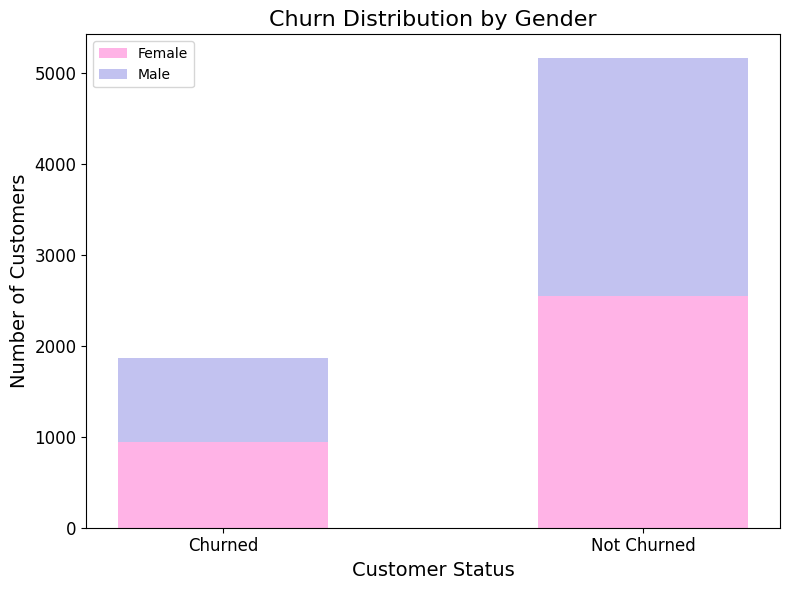

In [ ]:
# Data
categories = ['Churned', 'Not Churned']
values_female = [939, 2544]  # Churned females, Not churned females
values_male = [930, 2619]  # Churned males, Not churned males

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.5
index = np.arange(len(categories))

bar_female = plt.bar(index, values_female, bar_width, label='Female', color='#ffb3e6')
bar_male = plt.bar(index, values_male, bar_width, bottom=values_female, label='Male', color='#c2c2f0')

# Labels and title
plt.xlabel('Customer Status', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Churn Distribution by Gender', fontsize=16)
plt.xticks(index, categories, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


* There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Large percentage of Month-to-Month Contract opted to move out as compared to customrs with One and Two Year Contract.
* Large percentage of Month-to-Month Contract opted to continue using the service followed by Two Year Contract customers and One Year Contract.

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens do not churn.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Most customers churn in the absence of online security,

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with Paperless Billing are most likely to churn.

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

**Monthly Charges vs. Churn**

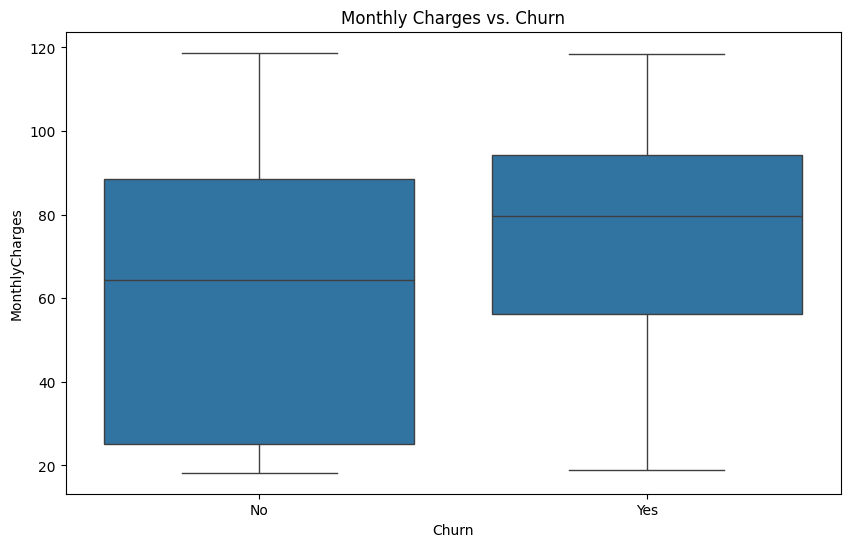

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.show()

**Distribution of customer tenure using a histogram to understand how long customers tend to stay before they churn**

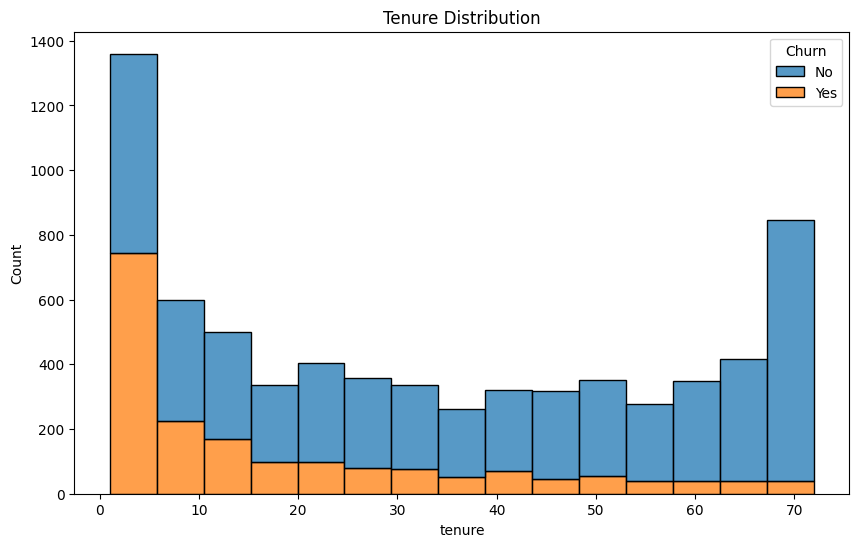

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure Distribution')
plt.show()

**Churn Rate by Contract Type**

<Figure size 1000x600 with 0 Axes>

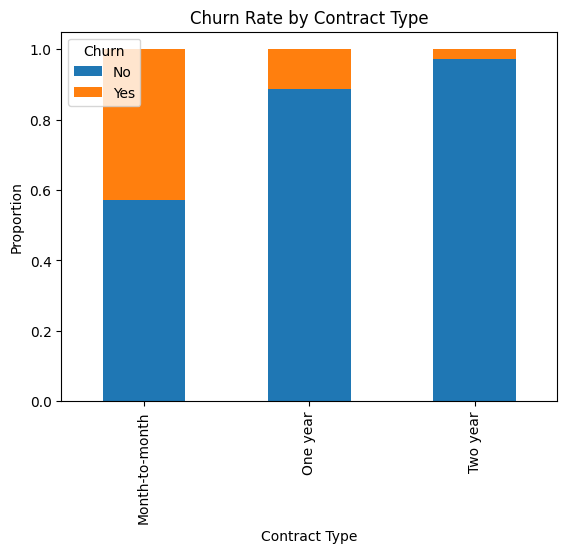

In [ ]:
plt.figure(figsize=(10, 6))
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')
plt.show()

**Total Charges vs. Tenure**

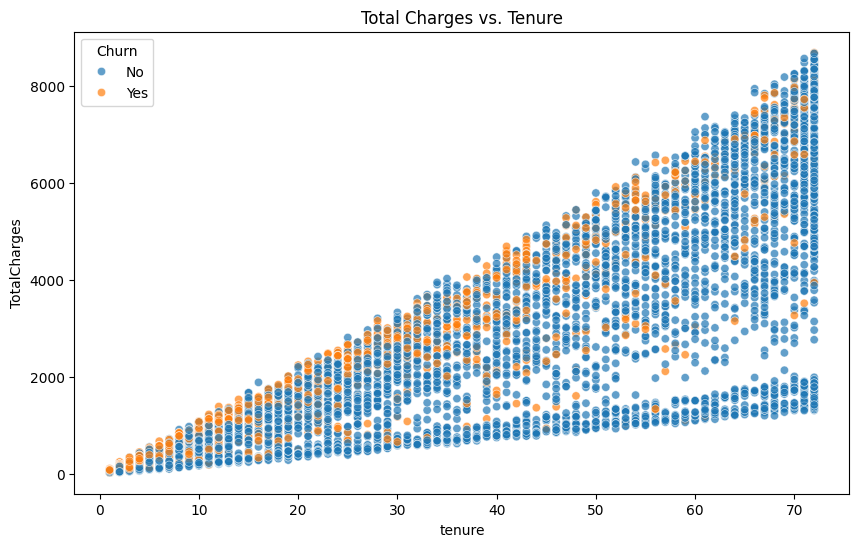

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df, alpha=0.7)
plt.title('Total Charges vs. Tenure')
plt.show()

**Pairplot of Numerical Features**

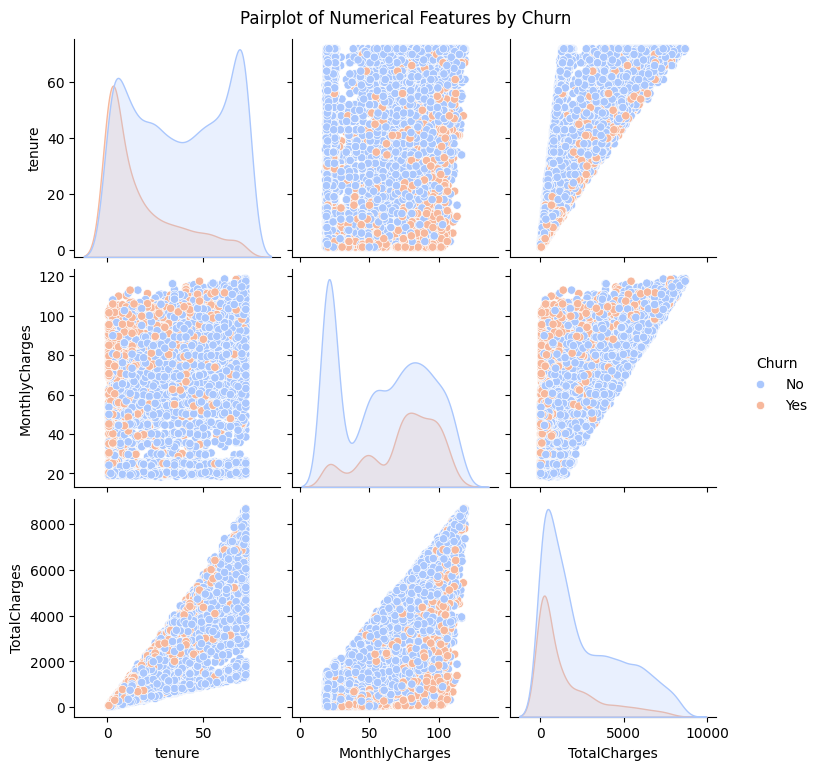

In [ ]:
sns.pairplot(df, hue='Churn', vars=['tenure', 'MonthlyCharges', 'TotalCharges'], palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()

<ipython-input-45-9321107cf963>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-45-9321107cf963>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




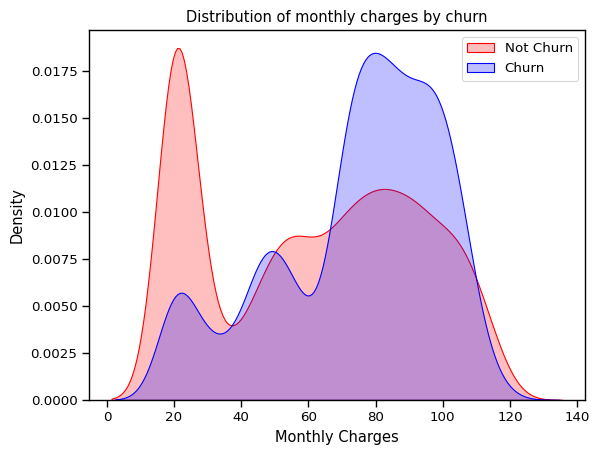

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


* Customers with higher Monthly Charges are also more likely to churn.

<ipython-input-46-8e2aa1c35de0>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-46-8e2aa1c35de0>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




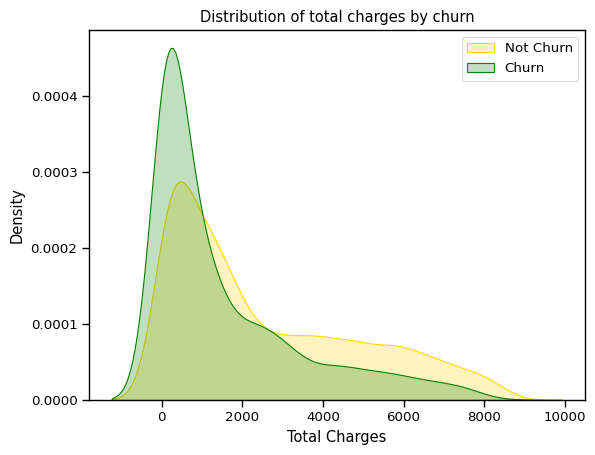

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


* New customers are more likely to churn

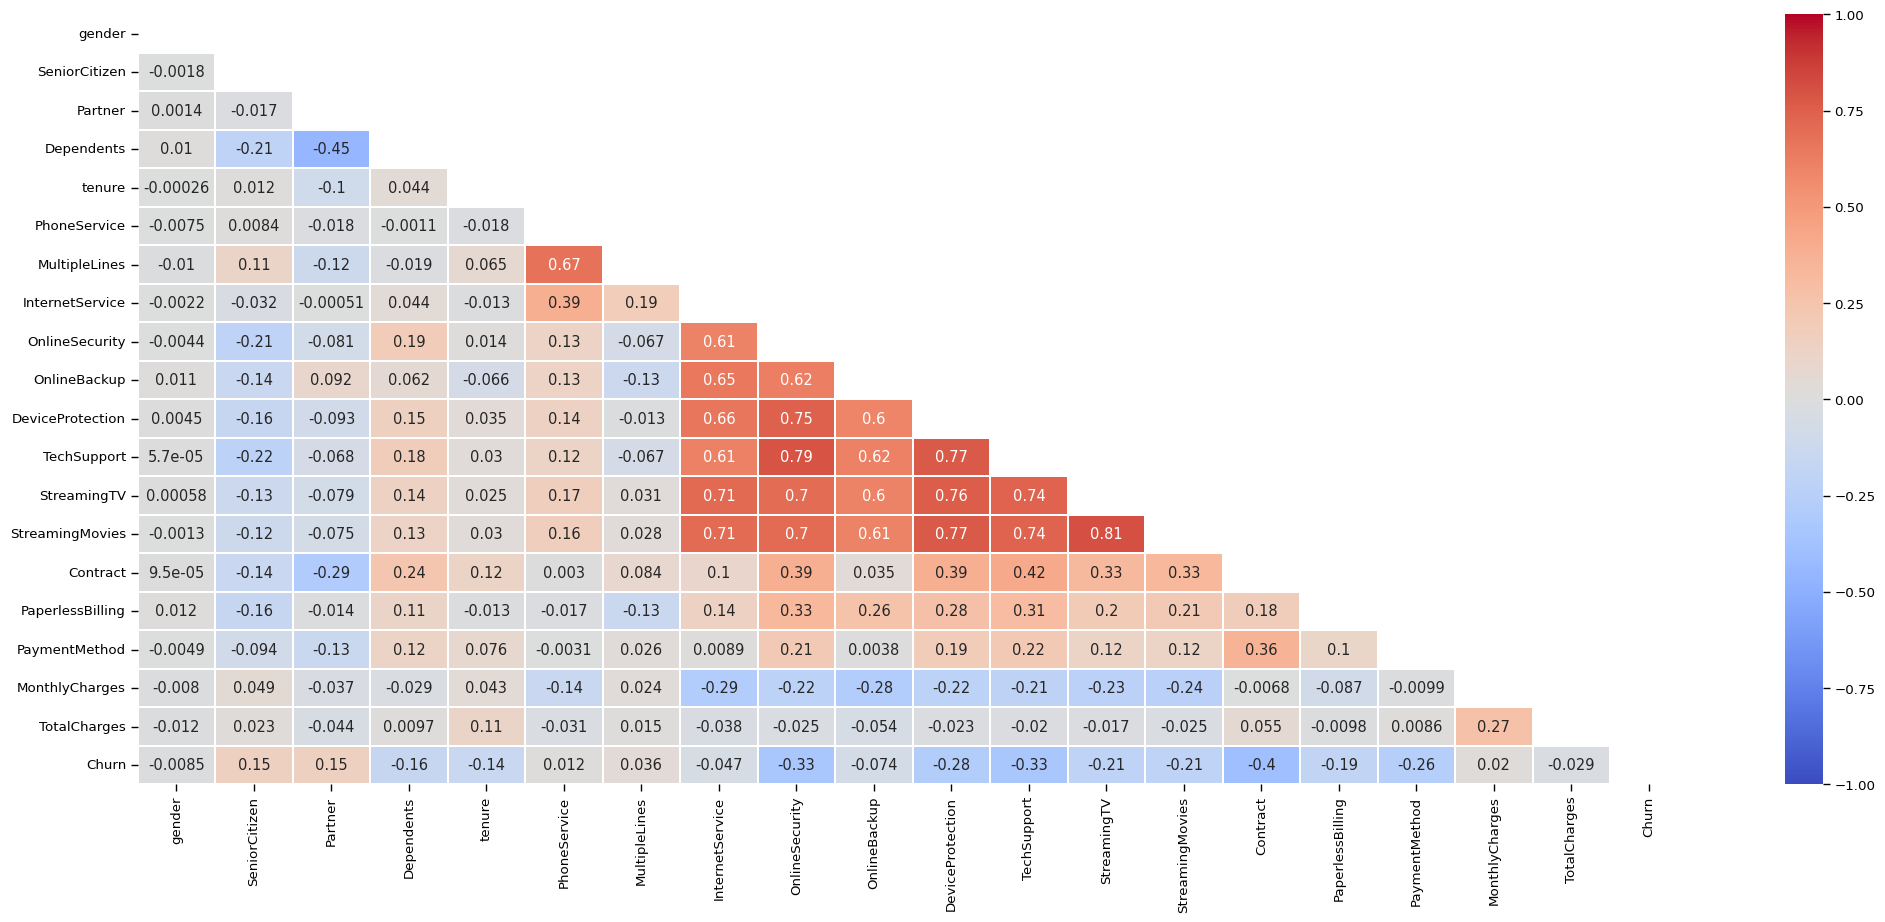

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

**DATA PREPROCESSING**

**Splitting the data into train and test sets**

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

BALANCING THE DATA

In [ ]:
pip install SMOTEENN()

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install SMOTEENN()'


In [ ]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X,y=sm.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-56-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-56-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-56-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

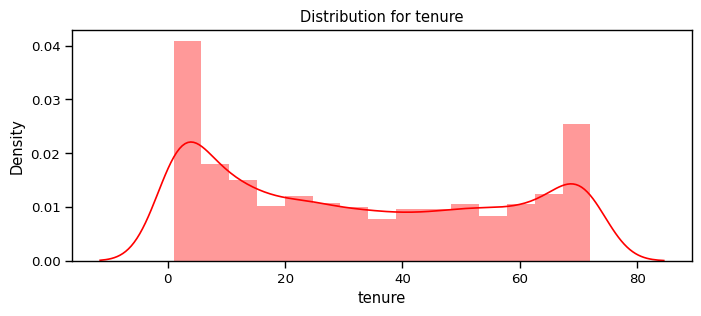

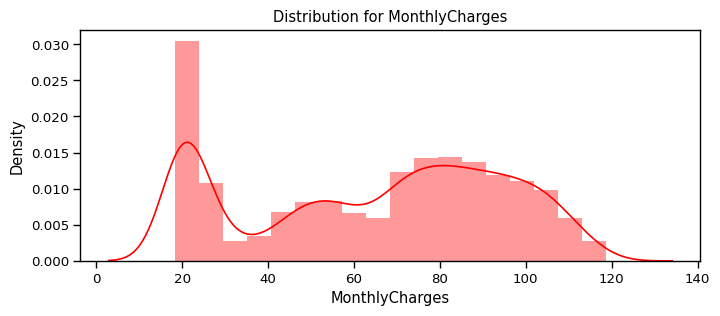

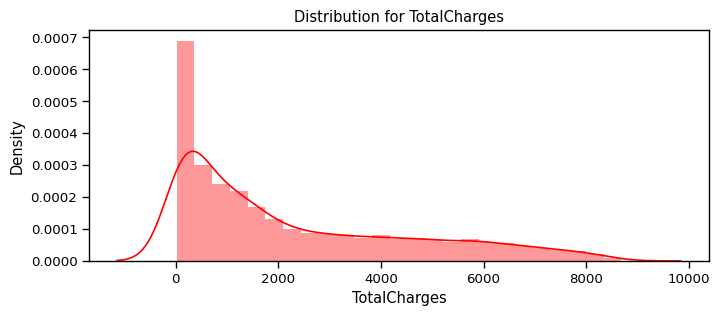

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

**Correlation**

In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


Multicollinearity will not be required because high correlation between any features of the dataset cannot be found.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

<ipython-input-56-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-56-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-56-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

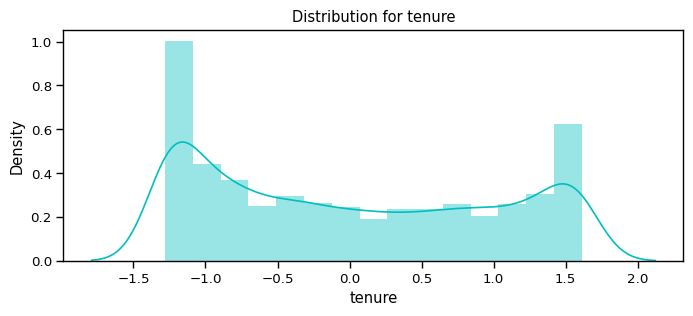

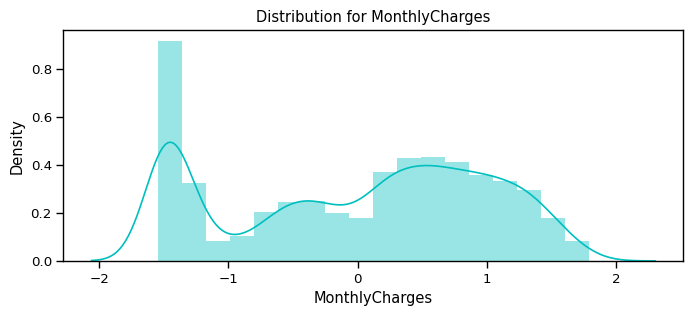

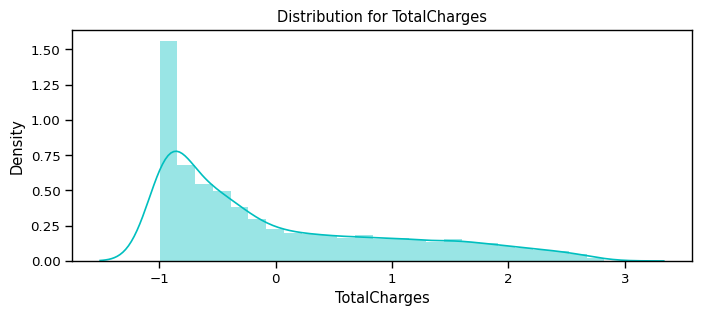

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

**STANDARDISATION**

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**8. Machine Learning Model Evaluations and Predictions**

In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score, KFold

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)


**KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.9098083427282976


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       793
           1       0.87      0.98      0.92       981

    accuracy                           0.91      1774
   macro avg       0.92      0.90      0.91      1774
weighted avg       0.92      0.91      0.91      1774



Accuracy: 78%

The KNN model correctly classifies 78% of the instances.

* Class 0 (Not Churned)

Precision: 83% - Out of all customers predicted to not churn, 83% actually did not churn.

Recall: 87% - Out of all customers who did not churn, 87% were correctly identified by the model.

F1-Score: 85% - The harmonic mean of precision and recall.

* Class 1 (Churned)

Precision: 59% - Out of all customers predicted to churn, 59% actually churned.

Recall: 52% - Out of all customers who churned, 52% were correctly identified by the model.

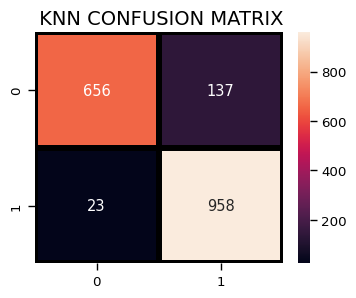

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" KNN CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
#Cross Validation
# Set a random seed for reproducibility
np.random.seed(42)
# Evaluate model
knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')
print("KNN - Cross-Validation Accuracy Scores:", knn_scores)
print("KNN - Mean Accuracy:", knn_scores.mean())
print("KNN - Standard Deviation:", knn_scores.std())

KNN - Cross-Validation Accuracy Scores: [0.93581081 0.9357022  0.91370558 0.92554992 0.92893401 0.93908629
 0.94923858 0.9357022  0.94416244 0.94077834]
KNN - Mean Accuracy: 0.9348670370878491
KNN - Standard Deviation: 0.009580154950703959


**Support Vector Machines**

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.9357384441939121


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       793
           1       0.93      0.96      0.94       981

    accuracy                           0.94      1774
   macro avg       0.94      0.93      0.93      1774
weighted avg       0.94      0.94      0.94      1774



Accuracy: 81%

The SVC model correctly classifies 81% of the instances.

* Class 0 (Not Churned)

Precision: 84% - Out of all customers predicted to not churn, 84% actually did not churn.

Recall: 92% - Out of all customers who did not churn, 92% were correctly identified by the model.

* Class 1 (Churned)

Precision: 69% - Out of all customers predicted to churn, 69% actually churned.

Recall: 50% - Out of all customers who churned, 50% were correctly identified by the model.

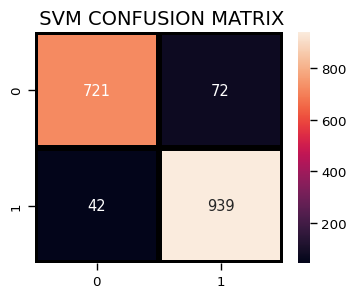

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" SVM CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
# Cross Validation
# Set a random seed for reproducibility
np.random.seed(42)
# Evaluate model
svm_scores = cross_val_score(svc_model, X, y, cv=kf, scoring='accuracy')
print("SVM - Cross-Validation Accuracy Scores:", svm_scores)
print("SVM - Mean Accuracy:", svm_scores.mean())
print("SVM - Standard Deviation:", svm_scores.std())

SVM - Cross-Validation Accuracy Scores: [0.84459459 0.83756345 0.84094755 0.8037225  0.82571912 0.82741117
 0.85448393 0.83248731 0.85956007 0.85617597]
SVM - Mean Accuracy: 0.8382665660584442
SVM - Standard Deviation: 0.016083714977809777


**Random Forest Classifier**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
print(classification_report(y_test, prediction_test))

Accuracy: 81%

The Random Forest model correctly classifies 81% of the instances.

* Class 0 (Not Churned)
Precision: 84% - Out of all customers predicted to not churn, 84% actually did not churn.

Recall: 92% - Out of all customers who did not churn, 92% were correctly identified by the model.

* Class 1 (Churned)

Precision: 71% - Out of all customers predicted to churn, 71% actually churned.

Recall: 51% - Out of all customers who churned, 51% were correctly identified by the model.

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
#Cross Validation
# Set a random seed for reproducibility
np.random.seed(42)
# Evaluate model
rf_scores = cross_val_score(model_rf, X, y, cv=kf, scoring='accuracy')
print("Random Forest - Cross-Validation Accuracy Scores:", rf_scores)
print("Random Forest - Mean Accuracy:", rf_scores.mean())
print("Random Forest - Standard Deviation:", rf_scores.std())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


**Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.9289740698985344


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       793
           1       0.92      0.96      0.94       981

    accuracy                           0.93      1774
   macro avg       0.93      0.93      0.93      1774
weighted avg       0.93      0.93      0.93      1774



Accuracy: 81%

The Logistic Regression model correctly classifies 81% of the instances.

* Class 0 (Not Churned)

Precision: 86% - Out of all customers predicted to not churn, 86% actually did not churn.

Recall: 89% - Out of all customers who did not churn, 89% were correctly identified by the model.

* Class 1 (Churned)

Precision: 66% - Out of all customers predicted to churn, 66% actually churned.

Recall: 58% - Out of all customers who churned, 58% were correctly identified by the model.

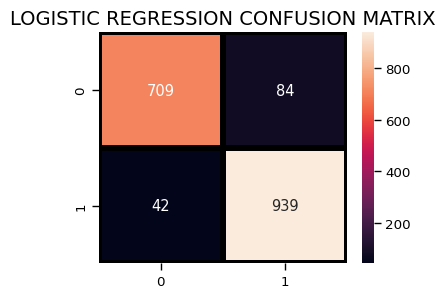

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
# Cross Validation
# Set a random seed for reproducibility
np.random.seed(42)
# Evaluate model
log_reg_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='accuracy')
print("Logistic Regression - Cross-Validation Accuracy Scores:", log_reg_scores)
print("Logistic Regression - Mean Accuracy:", log_reg_scores.mean())
print("Logistic Regression - Standard Deviation:", log_reg_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Logistic Regression - Cross-Validation Accuracy Scores: [0.9222973  0.94247039 0.9357022  0.90862944 0.91370558 0.91370558
 0.93739425 0.93401015 0.91539763 0.94077834]
Logistic Regression - Mean Accuracy: 0.9264090867517265
Logistic Regression - Standard Deviation: 0.0122730825063895


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.9458850056369785


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       793
           1       0.94      0.96      0.95       981

    accuracy                           0.95      1774
   macro avg       0.95      0.94      0.95      1774
weighted avg       0.95      0.95      0.95      1774



Accuracy: 73%

The Decision Tree model correctly classifies 73% of the instances.

* Class 0 (Not Churned)

Precision: 82% - Out of all customers predicted to not churn, 82% actually did not churn.

Recall: 80% - Out of all customers who did not churn, 80% were correctly identified by the model.

* Class 1 (Churned)

Precision: 49% - Out of all customers predicted to churn, 49% actually churned.

Recall: 53% - Out of all customers who churned, 53% were correctly identified by the model.

In [ ]:
# Cross Validation
# Set a random seed for reproducibility
np.random.seed(42)
# Evaluate model
dt_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')
print("Decision Tree - Cross-Validation Accuracy Scores:", dt_scores)
print("Decision Tree - Mean Accuracy:", dt_scores.mean())
print("Decision Tree - Standard Deviation:", dt_scores.std())

Decision Tree - Cross-Validation Accuracy Scores: [0.93581081 0.94077834 0.9357022  0.92554992 0.94247039 0.91708968
 0.94585448 0.94247039 0.94247039 0.9357022 ]
Decision Tree - Mean Accuracy: 0.9363898797274433
Decision Tree - Standard Deviation: 0.008432311897880976


#Comparison of Performance Metrics
###Overall Accuracy
All models have the same overall accuracy of 81%.
Precision and Recall for Class 0 (Not Churned)

##Precision:

Logistic Regression: 86%
SVM: 84%
Random Forest: 84%
Higher precision means Logistic Regression has fewer false positives for customers predicted to not churn.

##Recall:

Logistic Regression: 89%
SVM: 92%
Random Forest: 92%
Slightly lower recall for Logistic Regression indicates it misses more actual non-churn cases compared to the other two, but the difference is marginal.

##Precision and Recall for Class 1 (Churned)
###Precision:

Logistic Regression: 66%
SVM: 69%
Random Forest: 71%
Lower precision means Logistic Regression has more false positives for customers predicted to churn. However, the difference is not significant.

###Recall:

Logistic Regression: 58%
SVM: 50%
Random Forest: 51%
Higher recall for Logistic Regression indicates it correctly identifies more actual churn cases compared to the other two models. This is crucial if the goal is to catch as many churn cases as possible.

Logistic Regression is the best model due to its balanced performance across both classes. It has the highest precision (86%) for predicting non-churned customers, meaning fewer false positives, and the highest recall (58%) for predicting churned customers, identifying more actual churn cases. This balance is crucial for minimizing false alarms and effectively targeting interventions to reduce churn. Additionally, Logistic Regression's simplicity and interpretability make it an attractive choice for stakeholders.

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best model: ", best_model)

# Evaluate the best model on the test set
accuracy_dt = best_model.score(X_test, y_test)
print("Decision Tree accuracy with best parameters is: ", accuracy_dt)

dt_pred = best_model.predict(X_test)
report = classification_report(y_test, dt_pred)
print(report)


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best model:  DecisionTreeClassifier(max_depth=10)
Decision Tree accuracy with best parameters is:  0.9408117249154453
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       793
           1       0.94      0.95      0.95       981

    accuracy                           0.94      1774
   macro avg       0.94      0.94      0.94      1774
weighted avg       0.94      0.94      0.94      1774



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

**Inferences**

The Decision Tree model with the best parameters (criterion='entropy', max_depth=40, min_samples_leaf=2, etc.) performs well on the telecom customer churn dataset, achieving an overall accuracy of 93.00%. The model exhibits high precision and recall for both churn and non-churn classes, indicating a balanced performance.

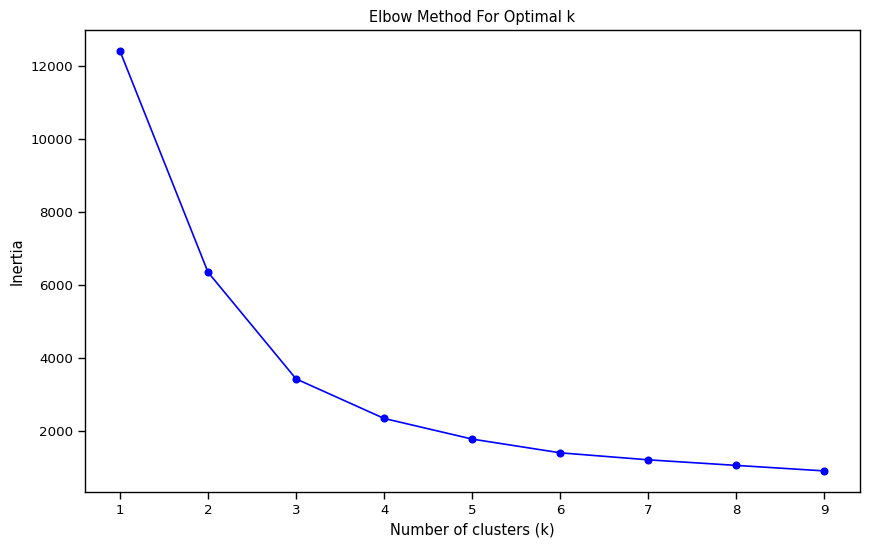

           gender  SeniorCitizen   Partner  Dependents    tenure  \
Cluster                                                            
0        0.473361       0.159836  0.635246    0.286885  1.258447   
1        0.471667       0.060000  0.478333    0.369167  0.171325   
2        0.339623       0.140235  0.190719    0.085161 -0.731175   

         PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Cluster                                                                 
0            0.927254       1.424180         0.580943        1.064549   
1            0.771667       0.554167         1.419167        0.863333   
2            0.968383       0.781744         0.770525        0.218256   

         OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Cluster                                                             
0            1.256148          1.309426     1.056352     1.352459   
1            0.865000          0.850000     0.845000     0.811667   
2            0.35

In [ ]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train[num_cols])
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the Elbow plot, choose an appropriate number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
# Ensure that df and X_train have the same number of rows if assigning clusters to df
df = X_train.copy()  # This assumes you want to work with the training data in df
df['Cluster'] = kmeans.fit_predict(X_train[num_cols])

# Analyze the resulting clusters
print(df.groupby('Cluster').mean())
